In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [5]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
mnist.data[0]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
# Total Samples = 70000, Total Pixles = 784

mnist.data.shape

(70000, 784)

In [8]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
mnist.target = [int(i) for i in mnist.target]

In [10]:
mnist.target[0:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

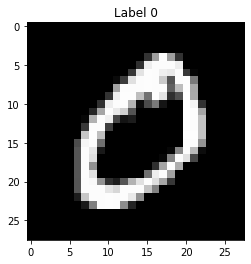

In [11]:
plt.imshow(np.reshape(mnist.data[1], (28, 28)), cmap = 'gray')
plt.title("Label %i" %mnist.target[1])
plt.show()

In [12]:
np.reshape(mnist.data[1], (28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [13]:
X = mnist.data
Y = mnist.target

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0 )

In [15]:
X_train.shape

(59500, 784)

In [16]:
X_test.shape

(10500, 784)

In [17]:
from sklearn.svm import SVC

In [18]:
model_l = SVC(kernel = 'poly', degree = 2, gamma = 'auto')
model_l.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
model_l.score(X_test, Y_test)

0.9786666666666667

In [22]:
predictions = model_l.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, predictions) 

array([[1045,    0,    2,    0,    0,    0,    3,    0,    2,    0],
       [   0, 1186,    3,    0,    0,    0,    0,    2,    1,    0],
       [   3,    0, 1072,    4,    1,    0,    1,    5,    5,    1],
       [   0,    2,   17, 1010,    0,    7,    0,    2,   12,    2],
       [   1,    1,    2,    0,  985,    0,    2,    3,    1,    8],
       [   0,    0,    4,    8,    0,  900,    5,    1,    4,    2],
       [   4,    0,    1,    0,    4,    6, 1027,    0,    1,    0],
       [   0,    4,    7,    0,    6,    0,    0, 1095,    0,    8],
       [   1,    7,    7,    5,    1,    2,    4,    0,  977,    6],
       [   4,    1,    1,    6,    6,    6,    1,    6,    2,  979]])

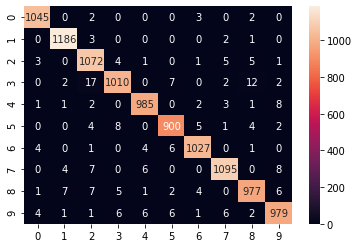

In [24]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt = '0.0f')

In [25]:
import cv2

In [26]:
# 0 - Gray Scale

img = cv2.imread('/content/2.png', 0)

In [27]:
img.shape

(541, 484)

In [28]:
img_data = cv2.resize(img, (28,28))

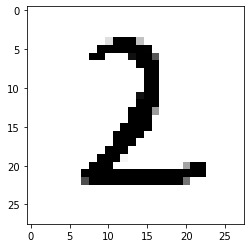

In [29]:
plt.imshow(img_data, cmap = 'gray')

In [30]:
# Bitwise operation not for image samples 
img_data = cv2.bitwise_not(img_data)

Text(0.5, 1.0, 'Label O/P: 2')

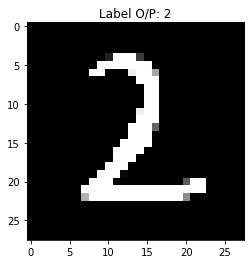

In [33]:
plt.imshow(img_data, cmap = 'gray')
img_new = np.reshape(img_data, (1, 784))
plt.title("Label O/P: %i" %model_l.predict(img_new))

In [34]:
# 0 - Gray Scale

img3 = cv2.imread('/content/3.png', 0)

In [35]:
img_data3 = cv2.resize(img3, (28,28))

In [36]:
# Bitwise operation not for image samples 
img_data3 = cv2.bitwise_not(img_data3)

Text(0.5, 1.0, 'Label O/P: 3')

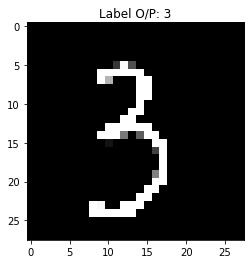

In [37]:
plt.imshow(img_data3, cmap = 'gray')
img_new3 = np.reshape(img_data3, (1, 784))
plt.title("Label O/P: %i" %model_l.predict(img_new3))